In [37]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Mínimos con regularización

Garantizando que la matríz $\tilde\phi^T.\tilde\phi$ tenga inversa, se procura incluir un parámetro alpha de valor muy pequeño $0<\alpha<1$ de tal forma que los autovalores de esta matriz no sean cero. Por tanto:

$$\theta_{WLS} = \tilde{\phi^+}.\tilde{y_N}$$

Se reescribe así:

$$\theta_{WLS} = (\tilde{\phi^T}.\tilde{\phi}+\alpha.I)^-1.\tilde{\phi}^T.y_N$$


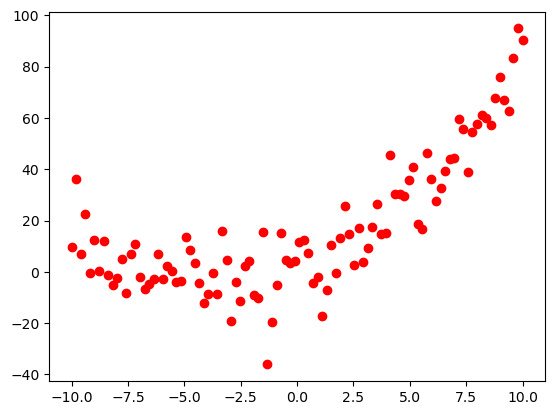

In [38]:
## Generando los valores medidos a partir 
## de un valor ideal contaminado por ruido
t = np.linspace([-10],[10],100)

pol = [0.5,3,1]
y = np.polyval(pol,t) 

r = 9
yn = y + np.random.normal(0,r,t.shape)
plt.scatter(t,yn,color = 'red')

In [41]:
## Definiendo el orden deseado si es un modelo polinomial
orden = 10
phi = (t**0)
#Creación del vector phi
for n in range(1,orden+1):
    phi = np.concatenate((t**n, phi), axis=1)

In [42]:
#Valor de regularización
alpha = 0.01          
A = np.dot(phi.T,phi)+alpha*np.eye(orden+1)
p_estimado = np.dot(np.linalg.inv(A),np.dot(phi.T,yn))
y_estimado = np.polyval(p_estimado,t)

p_estimado

array([[-3.10971794e-08],
       [ 2.48371094e-07],
       [ 7.21860378e-06],
       [-5.60480600e-05],
       [-4.66289734e-04],
       [ 4.23680380e-03],
       [ 3.92836273e-03],
       [-1.13846925e-01],
       [ 7.26483035e-01],
       [ 3.86785175e+00],
       [-6.59307391e-01]])

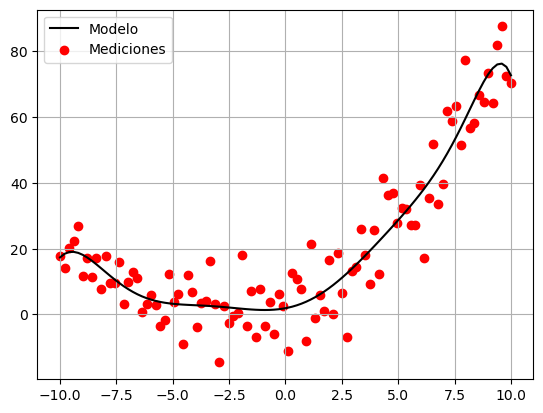

In [23]:
plt.plot(t,y_estimado,color = 'black')
plt.scatter(t,yn,color = 'red')
plt.legend(['Modelo','Mediciones'])
plt.grid()

In [24]:
## Ecuación estimada 
cad = '';
for n in range(0,orden+1):
    cad = cad+str(p_estimado[n])+'t^'+str(n)+'+'

ECM = np.sqrt(np.dot((yn-y_estimado).T , (yn-y_estimado))/len(t))
cad, ECM

('[-1.9531283e-09]t^0+[-1.49739959e-07]t^1+[-1.74348066e-06]t^2+[3.26911017e-05]t^3+[0.00034653]t^4+[-0.00259163]t^5+[-0.01958844]t^6+[0.09676236]t^7+[0.86397749]t^8+[1.2934376]t^9+[1.89137337]t^10+',
 array([[7.84574385]]))